In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup

import pandas as pd
import time

## 페이지 크롤링

In [2]:
ser = Service('chromedriver.exe')
driver = webdriver.Chrome(service = ser)

In [3]:
url = 'http://search.danawa.com/dsearch.php?k1=스피커'
driver.get(url)

In [4]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [5]:
#prod_items = soup.select('ul.product_list div.prod_main_info')
prod_items = soup.select('div.main_prodlist > ul.product_list > li.prod_item')
print(len(prod_items))
prod_items

44


[<li class="prod_item " id="productItem9774684">
 <input id="productItem_categoryInfo_9774684" type="hidden" value="태블릿/휴대폰_디지털오디오"/>
 <input id="min_price_9774684" type="hidden" value="99000"/>
 <div class="prod_main_info">
 <div class="thumb_image">
 <a class="thumb_link click_log_product_standard_img_" href="http://prod.danawa.com/info/?pcode=9774684&amp;keyword=%EC%8A%A4%ED%94%BC%EC%BB%A4&amp;cate=12237379" id="thumbLink_9774684" onmousedown="_trkEventLog('통합검색_상품블로그_유입');" target="_blank">
 <img alt="Flip 5" onerror="this.onerror=null; this.src='//img.danawa.com/new/noData/img/noImg_160.gif';" src="//img.danawa.com/prod_img/500000/684/774/img/9774684_1.jpg?shrink=130:130&amp;_v=20200319164149"/>
 </a>
 <a class="btn_view_zoom" data-assemblygallerycategory="N" href="#" id="imageZoom_9774684" onclick="return false;">
 <span class="ico i_zoom_vw"></span>이미지보기
 						</a>
 <input id="hidden_cate_sub_c1" type="hidden" value="224"/>
 <input id="hidden_cate_sub_c2" type="hidden" value="4

In [6]:
prod_items[0]

<li class="prod_item " id="productItem9774684">
<input id="productItem_categoryInfo_9774684" type="hidden" value="태블릿/휴대폰_디지털오디오"/>
<input id="min_price_9774684" type="hidden" value="99000"/>
<div class="prod_main_info">
<div class="thumb_image">
<a class="thumb_link click_log_product_standard_img_" href="http://prod.danawa.com/info/?pcode=9774684&amp;keyword=%EC%8A%A4%ED%94%BC%EC%BB%A4&amp;cate=12237379" id="thumbLink_9774684" onmousedown="_trkEventLog('통합검색_상품블로그_유입');" target="_blank">
<img alt="Flip 5" onerror="this.onerror=null; this.src='//img.danawa.com/new/noData/img/noImg_160.gif';" src="//img.danawa.com/prod_img/500000/684/774/img/9774684_1.jpg?shrink=130:130&amp;_v=20200319164149"/>
</a>
<a class="btn_view_zoom" data-assemblygallerycategory="N" href="#" id="imageZoom_9774684" onclick="return false;">
<span class="ico i_zoom_vw"></span>이미지보기
						</a>
<input id="hidden_cate_sub_c1" type="hidden" value="224"/>
<input id="hidden_cate_sub_c2" type="hidden" value="49727"/>
<inpu

In [7]:
prod_items[0].select('p.prod_name > a')[0].text

'JBL Flip 5'

In [8]:
prod_items[0].select('div.spec_list')[0].text.strip()

'포터블스피커 / 20W / 80dB / 65Hz~20KHz / 블루투스 v4.2 / A2DP / AVRCP / TWS / 배터리잔량표시 / 재생시간: 12시간 / 충전시간:2.5시간 / 충전단자: USB타입C / 배터리 용량: 4,800mAh / 내장배터리 / 방수등급: IPX7 / 540g / 드라이버유닛: 44x80mm / Party Boost'

In [9]:
prod_items[0].select('p.price_sect > a > strong')[0].text.strip().replace(',','')

'99000'

In [10]:
prod_data = []

for prod_item in prod_items:
    #if 'product-pot' in prod_item['class']:
        #continue # 공백부분('li.prod_item.product-pot') 제외하기
    try:
        title = prod_item.select('p.prod_name > a')[0].text.strip()
        spec_list = prod_item.select('div.spec_list')[0].text.strip()
        price = prod_item.select('p.price_sect > a > strong')[0].text.strip().replace(',','')
        prod_data.append([title, spec_list, price])
    except:
        pass # 진행 시 에러가 발생할 경우(광고 상품 등) 넘어가기
    
print(len(prod_data))
prod_data[:5]

41


[['JBL Flip 5',
  '포터블스피커 / 20W / 80dB / 65Hz~20KHz / 블루투스 v4.2 / A2DP / AVRCP / TWS / 배터리잔량표시 / 재생시간: 12시간 / 충전시간:2.5시간 / 충전단자: USB타입C / 배터리 용량: 4,800mAh / 내장배터리 / 방수등급: IPX7 / 540g / 드라이버유닛: 44x80mm / Party Boost',
  '99000'],
 ['캔스톤 R770BT',
  'PC스피커 / 2.0채널 / 북셸프 / 50W(25Wx2) / 40Hz~20kHz / 블루투스 / 블루투스버전: v5.0 / LINE-IN / BASS조절 / TREBLE조절 / 볼륨조절 / USB메모리 / RCA / AC전원 / 4kg / 액티브 / 크기(가로x세로x깊이): 153x247x175mm',
  '69000'],
 ['마샬 Stanmore II',
  '탁상용스피커 / 80W / 101dB / 50Hz~20kHz / 블루투스 / ver 5.0 / aptX / AUX / RCA / BASS조절 / TREBLE조절 / 멀티페어링 / 볼륨조절 / 재생,멈춤 / 전용앱지원 / AC전원 / 4.65kg / 드라이버유닛: 19.05mm / 우퍼: 133.35mm / TWS / 크기(가로x세로x깊이): 350x195x185mm',
  '600000'],
 ['Creative PEBBLE V3',
  'PC스피커 / 2.0채널 / 새틀라이트 / 8W / 75dB / 3.5mm / 블루투스버전: v5.0 / SBC / 아날로그 / 볼륨조절 / USB전원 / 0.7kg / 액티브 / A2DP / USB타입C / 게인조절',
  '59870'],
 ['에디파이어 MR4',
  'PC스피커 / 북셸프 / 액티브타입 / 42W(21Wx2) / 60Hz~20kHz / 헤드폰단자 / 볼륨조절 / AUX / TRS / RCA / 액티브',
  '83610']]

In [11]:
# 상품 정보 태그에서 원하는 정보를 추출하는 함수
def get_prod_items(prod_itmes):
    prod_data = []

    for prod_item in prod_items:
        #if 'product-pot' in prod_item['class']:
            #continue # 공백부분('li.prod_item.product-pot') 제외하기
        try:
            title = prod_item.select('p.prod_name > a')[0].text.strip()
            spec_list = prod_item.select('div.spec_list')[0].text.strip()
            price = prod_item.select('p.price_sect > a > strong')[0].text.strip().replace(',','')
            prod_data.append([title, spec_list, price])
            
        except:
            pass # 진행 시 에러가 발생할 경우(광고 상품 등) 넘어가기
    return prod_data

In [12]:
# 상품 정보를 가져오는 함수 테스트
prod_items = soup.select('div.main_prodlist > ul.product_list > li.prod_item')
prod_data = get_prod_items(prod_items)
print(len(prod_data))
prod_data

41


[['JBL Flip 5',
  '포터블스피커 / 20W / 80dB / 65Hz~20KHz / 블루투스 v4.2 / A2DP / AVRCP / TWS / 배터리잔량표시 / 재생시간: 12시간 / 충전시간:2.5시간 / 충전단자: USB타입C / 배터리 용량: 4,800mAh / 내장배터리 / 방수등급: IPX7 / 540g / 드라이버유닛: 44x80mm / Party Boost',
  '99000'],
 ['캔스톤 R770BT',
  'PC스피커 / 2.0채널 / 북셸프 / 50W(25Wx2) / 40Hz~20kHz / 블루투스 / 블루투스버전: v5.0 / LINE-IN / BASS조절 / TREBLE조절 / 볼륨조절 / USB메모리 / RCA / AC전원 / 4kg / 액티브 / 크기(가로x세로x깊이): 153x247x175mm',
  '69000'],
 ['마샬 Stanmore II',
  '탁상용스피커 / 80W / 101dB / 50Hz~20kHz / 블루투스 / ver 5.0 / aptX / AUX / RCA / BASS조절 / TREBLE조절 / 멀티페어링 / 볼륨조절 / 재생,멈춤 / 전용앱지원 / AC전원 / 4.65kg / 드라이버유닛: 19.05mm / 우퍼: 133.35mm / TWS / 크기(가로x세로x깊이): 350x195x185mm',
  '600000'],
 ['Creative PEBBLE V3',
  'PC스피커 / 2.0채널 / 새틀라이트 / 8W / 75dB / 3.5mm / 블루투스버전: v5.0 / SBC / 아날로그 / 볼륨조절 / USB전원 / 0.7kg / 액티브 / A2DP / USB타입C / 게인조절',
  '59870'],
 ['에디파이어 MR4',
  'PC스피커 / 북셸프 / 액티브타입 / 42W(21Wx2) / 60Hz~20kHz / 헤드폰단자 / 볼륨조절 / AUX / TRS / RCA / 액티브',
  '83610'],
 ['v0yKUNRRyX', 'v0yKUNRRyX904030', '904030']

### 여러 페이지 크롤링

In [ ]:
# 1페이지
http://search.danawa.com/dsearch.php?k1=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&module=goods&act=dispMain

http://search.danawa.com/dsearch.php?query=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&\
    originalQuery=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&previousKeyword=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&\
    volumeType=allvs&page=1&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&\
    defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2606&defaultVaTab=390097&tab=goods    
    
# 2페이지
http://search.danawa.com/dsearch.php?query=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&\
    originalQuery=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&volumeType=allvs&page=2&limit=40&sort=saveDESC&list=list\
    &boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0\
    &defaultVmTab=2606&defaultVaTab=390097&tab=goods
    
# 3페이지
http://search.danawa.com/dsearch.php?query=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&\
    originalQuery=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&volumeType=allvs&page=3&limit=40&sort=saveDESC&list=list&\
    boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0\
    &defaultVmTab=2606&defaultVaTab=390097&tab=goods

In [ ]:
http://search.danawa.com/dsearch.php?query={검색어}&volumeType=allvs&page={페이지}&limit=40&sort=saveDESC&list=list\
    &boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0\
    &defaultVmTab=2606&defaultVaTab=390097&tab=goods

In [13]:
def get_search_page_url(keyword, page):
    return 'http://search.danawa.com/dsearch.php?query={}&\
originalQuery={}&volumeType=allvs&page={}&limit=40&sort=saveDESC&list=list&\
boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0\
&defaultVmTab=2606&defaultVaTab=390097&tab=goods'.format(keyword, keyword, page)

In [25]:
keyword = '무선청소기'
page = 1
url = get_search_page_url(keyword, page)
print(url)

http://search.danawa.com/dsearch.php?query=무선청소기&originalQuery=무선청소기&volumeType=allvs&page=1&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2606&defaultVaTab=390097&tab=goods


### 주피터 노트북의 진행표시줄 처리

In [15]:
import time
from tqdm import tqdm_notebook

In [17]:
keyword = '스피커'
total_page = 10
prod_data_total = []

for page in tqdm_notebook(range(1, total_page+1)):
    url = get_search_page_url(keyword, page)
    driver.get(url)
    
    time.sleep(5)
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    prod_items = soup.select('div#productListArea > div.main_prodlist > ul.product_list > li.prod_item')
    prod_item_list = get_prod_items(prod_items)
    
    prod_data_total = prod_data_total + prod_item_list

<ipython-input-17-531e88b9c1f3>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for page in tqdm_notebook(range(1, total_page+1)):


  0%|          | 0/10 [00:00<?, ?it/s]

In [18]:
prod_data_total

[['JBL Flip 5',
  '포터블스피커 / 20W / 80dB / 65Hz~20KHz / 블루투스 v4.2 / A2DP / AVRCP / TWS / 배터리잔량표시 / 재생시간: 12시간 / 충전시간:2.5시간 / 충전단자: USB타입C / 배터리 용량: 4,800mAh / 내장배터리 / 방수등급: IPX7 / 540g / 드라이버유닛: 44x80mm / Party Boost',
  '99000'],
 ['캔스톤 R770BT',
  'PC스피커 / 2.0채널 / 북셸프 / 50W(25Wx2) / 40Hz~20kHz / 블루투스 / 블루투스버전: v5.0 / BASS조절 / TREBLE조절 / 볼륨조절 / AUX / USB포트 / RCA / AC전원 / 4kg / 액티브 / 크기(가로x세로x깊이): 153x247x175mm',
  '69000'],
 ['xABjdmd9DF', 'xABjdmd9DF833781', '833781'],
 ['마샬 Stanmore II',
  '탁상용스피커 / 80W / 101dB / 50Hz~20kHz / 블루투스 / ver 5.0 / aptX / AUX / RCA / BASS조절 / TREBLE조절 / 멀티페어링 / 볼륨조절 / 재생,멈춤 / 전용앱지원 / AC전원 / 4.65kg / 드라이버유닛: 19.05mm / 우퍼: 133.35mm / TWS / 크기(가로x세로x깊이): 350x195x185mm',
  '600000'],
 ['Creative PEBBLE V3',
  'PC스피커 / 2.0채널 / 새틀라이트 / 8W / 75dB / 3.5mm / 블루투스버전: v5.0 / SBC / 볼륨조절 / USB전원 / 0.7kg / 액티브 / A2DP / USB타입C / 게인조절',
  '59870'],
 ['에디파이어 MR4',
  'PC스피커 / 북셸프 / 액티브타입 / 42W(21Wx2) / 60Hz~20kHz / 볼륨조절 / AUX / 헤드폰단자 / TRS / RCA / 액티브',
  '83610'],
 ['하만카돈 Au

In [19]:
len(prod_item_list)

41

In [20]:
data = pd.DataFrame(prod_data_total)
data.columns = ['상품명','스펙 목록','가격']
data

,상품명,스펙 목록,가격
0,JBL Flip 5,포터블스피커 / 20W / 80dB / 65Hz~20KHz / 블루투스 v4.2 /...,99000
1,캔스톤 R770BT,PC스피커 / 2.0채널 / 북셸프 / 50W(25Wx2) / 40Hz~20kHz ...,69000
2,xABjdmd9DF,xABjdmd9DF833781,833781
3,마샬 Stanmore II,탁상용스피커 / 80W / 101dB / 50Hz~20kHz / 블루투스 / ver...,600000
4,Creative PEBBLE V3,PC스피커 / 2.0채널 / 새틀라이트 / 8W / 75dB / 3.5mm / 블루...,59870
...,...,...,...
405,야마하 VXS1ML,PA스피커 / 5W / 풀레인지 / 79dB / 8Ω / Peak 20W / 주파수...,225000
406,PreSonus Eris E5XT,HiFi스피커 / 북셸프 / 액티브타입 / 10kΩ / 102dB / 48Hz~20...,198000
407,이케아 에네뷔 20,"탁상용스피커 / 30W / 블루투스 / ver 4.2 / 볼륨조절 / AC,DC전원...",99900
408,클립쉬 레퍼런스 R-51M,HiFi스피커 / 2.0채널 / 북셸프 / 저음반사형 / 허용입력: 85-340W ...,342600


In [21]:
#data.to_excel('8.danawa_crawling_result.xlsx', index = False)

## 다나와 크롤링 데이터 전처리
1. 상품명 데이터에서 회사명과 제품명 분리
2. 일반 문자열로 저장된 스펙 목록을 필요한 스펙으로 분류 및 단위 통합

In [22]:
data = pd.read_excel('8.danawa_crawling_result.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     410 non-null    object
 1   스펙 목록   410 non-null    object
 2   가격      410 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.7+ KB


In [23]:
data.head()

,상품명,스펙 목록,가격
0,JBL Flip 5,포터블스피커 / 20W / 80dB / 65Hz~20KHz / 블루투스 v4.2 /...,99000
1,캔스톤 R770BT,PC스피커 / 2.0채널 / 북셸프 / 50W(25Wx2) / 40Hz~20kHz ...,69000
2,xABjdmd9DF,xABjdmd9DF833781,833781
3,마샬 Stanmore II,탁상용스피커 / 80W / 101dB / 50Hz~20kHz / 블루투스 / ver...,600000
4,Creative PEBBLE V3,PC스피커 / 2.0채널 / 새틀라이트 / 8W / 75dB / 3.5mm / 블루...,59870


### 회사명, 모델명 정리

In [24]:
title = 'JBL Flip 5'
info = title.split(' ',1) # 공백을 기준으로 첫 번째 공백에 대해서만 구분
info

['JBL', 'Flip 5']

In [25]:
company_list = []
product_list = []
for title in data['상품명']:
    #if (len(title.split(' ')) == 1):
        #continue
    try:    
        title_info = title.split(' ', 1)
        company_name = title_info[0]
        product_name = title_info[1]
        company_list.append(company_name)
        product_list.append(product_name)

    except:
        company_list.append('None')
        product_list.append('None')

In [26]:
print(len(company_list))
print(len(product_list))
print(company_list[:5])
print(product_list[:5])

410
410
['JBL', '캔스톤', 'None', '마샬', 'Creative']
['Flip 5', 'R770BT', 'None', 'Stanmore II', 'PEBBLE V3']


### 스펙 목록 데이터 정리
- 스펙 목록에서 카테고리, 사용시간, 흡입력 추출
- 카테고리 : 스펙 리스트의 첫 번째 항목에 위치
- 사용시간 : "사용시간" 문구가 명시
- 흡입력 : "흡입력" 문구가 명시

In [27]:
data['스펙 목록'][0]

'포터블스피커 / 20W / 80dB / 65Hz~20KHz / 블루투스 v4.2 / A2DP / AVRCP / TWS / 배터리잔량표시 / 재생시간: 12시간 / 충전시간:2.5시간 / 충전단자: USB타입C / 배터리 용량: 4,800mAh / 내장배터리 / 방수등급: IPX7 / 540g / 드라이버유닛: 44x80mm / Party Boost'

In [28]:
spec_list = data['스펙 목록'][0].split(' / ')
spec_list

['포터블스피커',
 '20W',
 '80dB',
 '65Hz~20KHz',
 '블루투스 v4.2',
 'A2DP',
 'AVRCP',
 'TWS',
 '배터리잔량표시',
 '재생시간: 12시간',
 '충전시간:2.5시간',
 '충전단자: USB타입C',
 '배터리 용량: 4,800mAh',
 '내장배터리',
 '방수등급: IPX7',
 '540g',
 '드라이버유닛: 44x80mm',
 'Party Boost']

In [30]:
category = spec_list[0]
category

'포터블스피커'

In [47]:
for spec in spec_list:
    if '재생시간' in spec:
        use_time_spec = spec
    elif '블루투스' in spec:
        suction_spec = spec
print(use_time_spec)
print(suction_spec)

재생시간: 4시간
블루투스버전: v5.0


In [48]:
use_time_spec.split(' ')[1].strip()

'4시간'

In [56]:
suction_spec.split(' ')[1].strip()

['블루투스버전:', 'v5.0']

In [53]:
# 카테고리, 사용시간, 흡입력 추출
category_list = []
use_time_list = []
suction_list = []

for spec_data in data['스펙 목록']:
    try:
        spec_list = spec_data.split(' / ')

        category = spec_list[0]
        category_list.append(category)
    
    except:
        pass
    
    use_time_value = None
    suction_value = None

    for spec in spec_list:
        if '재생시간' in spec:
            use_time_value = spec.split(' ')[1].strip()
        if '블루투스' in spec:
            suction_value = spec.split(' ')[-1].strip()

    use_time_list.append(use_time_value)
    suction_list.append(suction_value)

In [142]:
print('카테고리', len(category_list), category_list[0:5])
print('재생시간', len(use_time_list), use_time_list[0:5])
print('블루투스', len(suction_list), suction_list[0:5])

카테고리 410 ['포터블스피커', 'PC스피커', 'xABjdmd9DF833781', '탁상용스피커', 'PC스피커']
재생시간 410 ['12시간', None, None, None, None]
블루투스 410 ['v4.2', 'v5.0', None, '블루투스', 'v5.0']


### 사용시간 단위 통일시키기

In [90]:
use_time_list

['12시간',
 None,
 None,
 None,
 None,
 None,
 None,
 '20시간',
 None,
 '12시간',
 None,
 None,
 None,
 '5시간',
 None,
 '18시간',
 None,
 '12시간',
 None,
 '18시간',
 None,
 '30시간',
 None,
 None,
 None,
 None,
 None,
 None,
 '6~8시간',
 None,
 '6시간',
 '12시간',
 None,
 None,
 None,
 '8시간',
 None,
 None,
 None,
 None,
 '8시간',
 None,
 '10시간',
 '13시간',
 '14시간',
 '8시간',
 None,
 '30시간',
 None,
 '12시간',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '16시간',
 None,
 None,
 None,
 None,
 '약',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '12시간',
 None,
 None,
 None,
 None,
 '12시간',
 None,
 None,
 None,
 None,
 None,
 '15시간',
 None,
 '30시간',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '8시간',
 None,
 None,
 None,
 None,
 '20시간',
 None,
 '16시간',
 None,
 None,
 None,
 None,
 '12시간',
 '27시간',
 None,
 None,
 '20시간',
 None,
 None,
 None,
 None,
 None,
 None,
 '15시간',
 '11시간',
 Non

In [94]:
use_time_list[0].split('시간')[0]

'12'

In [106]:
'4~6시간'.split('시간')[0]

'4~6'

In [107]:
def convert_time_minute(time):
    try:
        if '시간' in time:
            hour = time.split('시간')[0]
            return int(hour)
    except:
        return None

In [108]:
convert_time_minute(use_time_list[0])

12

In [88]:
times = ['40분','4분','1시간','3시간30분','4시간','9~30분']
for time in times:
    time_value = convert_time_minute(time)
    print(time, "=", time_value)

40분 = None
4분 = None
1시간 = None
3시간30분 = None
4시간 = None
9~30분 = None


In [109]:
new_use_time_list = []
for time in use_time_list:
    value = convert_time_minute(time)
    new_use_time_list.append(value)
new_use_time_list

[12,
 None,
 None,
 None,
 None,
 None,
 None,
 20,
 None,
 12,
 None,
 None,
 None,
 5,
 None,
 18,
 None,
 12,
 None,
 18,
 None,
 30,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 6,
 12,
 None,
 None,
 None,
 8,
 None,
 None,
 None,
 None,
 8,
 None,
 10,
 13,
 14,
 8,
 None,
 30,
 None,
 12,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 16,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 12,
 None,
 None,
 None,
 None,
 12,
 None,
 None,
 None,
 None,
 None,
 15,
 None,
 30,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 8,
 None,
 None,
 None,
 None,
 20,
 None,
 16,
 None,
 None,
 None,
 None,
 12,
 27,
 None,
 None,
 20,
 None,
 None,
 None,
 None,
 None,
 None,
 15,
 11,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 Non

### 무선 청소기 흡입력 단위 통일 시키기
- W(Watt, 모터의 소비전력 단위)와 AW(airWatt, 진공청소기의 전력량)는 큰 차이가 없다.
- Pa(Pascal, 흡입력 단위)
- 1W = 1AW = 100PA

In [175]:
def get_suction(value):
    try:
        if power == '블루투스':
            blue = 4.2
        else:
            blue = power.split('블루투스')[0][-3:]
        return float(blue)

    except:
        return None

In [173]:
suction_list[0].split('블루투스')[0][-3:]

'4.2'

In [176]:
new_suction_list = []
for power in suction_list:
    value = get_suction(power)
    new_suction_list.append(value)
new_suction_list

[4.2,
 5.0,
 None,
 4.2,
 5.0,
 None,
 4.2,
 5.0,
 5.0,
 4.2,
 None,
 None,
 5.0,
 5.1,
 4.2,
 5.1,
 4.0,
 4.2,
 4.2,
 None,
 4.2,
 4.2,
 5.0,
 4.2,
 5.0,
 None,
 None,
 None,
 5.0,
 5.0,
 4.2,
 5.0,
 4.2,
 None,
 None,
 4.2,
 None,
 5.1,
 None,
 5.0,
 5.0,
 4.2,
 5.0,
 4.2,
 4.2,
 4.0,
 None,
 5.0,
 None,
 5.0,
 5.0,
 5.0,
 None,
 5.0,
 4.2,
 5.0,
 4.2,
 None,
 None,
 4.2,
 None,
 None,
 5.1,
 None,
 4.2,
 None,
 4.2,
 5.0,
 None,
 5.0,
 5.0,
 4.2,
 None,
 4.2,
 None,
 4.2,
 4.2,
 None,
 4.1,
 4.2,
 None,
 None,
 None,
 None,
 5.0,
 None,
 None,
 5.0,
 4.0,
 None,
 3.0,
 None,
 5.0,
 None,
 None,
 None,
 None,
 None,
 5.0,
 None,
 4.2,
 None,
 None,
 5.0,
 4.2,
 4.2,
 4.2,
 None,
 None,
 5.0,
 None,
 None,
 None,
 None,
 5.1,
 5.0,
 4.2,
 None,
 4.2,
 5.0,
 5.0,
 5.0,
 5.2,
 None,
 None,
 4.2,
 None,
 None,
 4.2,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 None,
 4.2,
 None,
 None,
 None,
 4.2,
 4.2,
 5.0,
 None,
 5.0,
 5.0,
 5.0,
 5.0,
 5.1,
 None,
 5.0,
 None,
 5.0,
 4.2,
 None,
 4.2,
 None,
 5.

In [185]:
pd_data = pd.DataFrame()
pd_data['카테고리'] = category_list
pd_data['회사명'] = company_list
pd_data['제품'] = product_list
pd_data['가격'] = data['가격'].astype('int')
pd_data['재생시간'] = new_use_time_list
pd_data['블루투스'] = new_suction_list
pd_data.head()

,카테고리,회사명,제품,가격,재생시간,블루투스
0,포터블스피커,JBL,Flip 5,99000,12.0,4.2
1,PC스피커,캔스톤,R770BT,69000,NaN,5.0
2,xABjdmd9DF833781,None,None,833781,NaN,NaN
3,탁상용스피커,마샬,Stanmore II,600000,NaN,4.2
4,PC스피커,Creative,PEBBLE V3,59870,NaN,5.0


In [186]:
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카테고리    410 non-null    object 
 1   회사명     410 non-null    object 
 2   제품      410 non-null    object 
 3   가격      410 non-null    int32  
 4   재생시간    76 non-null     float64
 5   블루투스    227 non-null    float64
dtypes: float64(2), int32(1), object(3)
memory usage: 17.7+ KB


In [188]:
condition = (pd_data['카테고리'] == 'PC스피커') | (pd_data['카테고리'] == '포터블스피커') |(pd_data['카테고리'] == 'HiFi스피커')|(pd_data['카테고리'] == '탁상용스피커')|(pd_data['카테고리'] == 'PA스피커')|(pd_data['카테고리'] == 'AI스피커')
pd_data_final = pd_data[condition]
print(len(pd_data_final))
pd_data_final.info()

389
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 409
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카테고리    389 non-null    object 
 1   회사명     389 non-null    object 
 2   제품      389 non-null    object 
 3   가격      389 non-null    int32  
 4   재생시간    76 non-null     float64
 5   블루투스    222 non-null    float64
dtypes: float64(2), int32(1), object(3)
memory usage: 19.8+ KB


In [132]:
pd_data['카테고리'].value_counts()

PC스피커               159
포터블스피커               84
HiFi스피커              50
PA스피커                45
탁상용스피커               41
AI스피커                10
스피커폰                  5
혼/유닛                  4
스피커패키지                2
R5e9LiCoFp887647      1
xABjdmd9DF833781      1
d8QfOhlK5D128092      1
FtYGQHKKp9640438      1
L9ONgFvIO4262652      1
SSwRRPhJ6z420566      1
EEOAF7zW3x348564      1
KaD2eUwWIT84816       1
X3gdTRQJQ227801       1
EPGga4Nrgc514096      1
Name: 카테고리, dtype: int64

In [154]:
pd_data['카테고리'].value_counts()

핸디/스틱청소기            290
차량용청소기              100
oWMrdYdtBC165889     10
물걸레청소기               10
Name: 카테고리, dtype: int64

In [179]:
pd_data_final.to_excel('8.danawa_data_final.xlsx', index=False)

## 무선청소기 모델별 비교 분석

In [234]:
danawa_data = pd.read_excel('8.danawa_data_final.xlsx')
danawa_data.head()

,카테고리,회사명,제품,가격,재생시간,블루투스
0,포터블스피커,JBL,Flip 5,99000,12.0,4.2
1,PC스피커,캔스톤,R770BT,69000,NaN,5.0
2,탁상용스피커,마샬,Stanmore II,600000,NaN,4.2
3,PC스피커,Creative,PEBBLE V3,59870,NaN,5.0
4,PC스피커,에디파이어,MR4,83610,NaN,NaN


In [235]:
danawa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카테고리    389 non-null    object 
 1   회사명     389 non-null    object 
 2   제품      389 non-null    object 
 3   가격      389 non-null    int64  
 4   재생시간    76 non-null     float64
 5   블루투스    222 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.4+ KB


In [236]:
top_list = danawa_data.sort_values(['재생시간'],ascending=False)
top_list.head()

,카테고리,회사명,제품,가격,재생시간,블루투스
95,포터블스피커,아이리버,사운드 에펠 TWS-EF7,15670,30.0,4.2
20,포터블스피커,로엘,버스킹 DJ,176100,30.0,4.2
319,포터블스피커,엠지텍,락 클래식 Q80 미니,39040,30.0,4.1
45,포터블스피커,MIFA,A90,73984,30.0,5.0
116,포터블스피커,뱅앤올룹슨,B&O PLAY Beosound Explore,279900,27.0,5.2


In [240]:
top_list = danawa_data.sort_values(['재생시간','가격'], ascending=False)
top_list.head()

,카테고리,회사명,제품,가격,재생시간,블루투스
20,포터블스피커,로엘,버스킹 DJ,176100,30.0,4.2
45,포터블스피커,MIFA,A90,73984,30.0,5.0
319,포터블스피커,엠지텍,락 클래식 Q80 미니,39040,30.0,4.1
95,포터블스피커,아이리버,사운드 에펠 TWS-EF7,15670,30.0,4.2
116,포터블스피커,뱅앤올룹슨,B&O PLAY Beosound Explore,279900,27.0,5.2


In [238]:
price_mean_value = danawa_data['가격'].mean()
suction_mean_value = danawa_data['블루투스'].mean()
use_time_mean_value = danawa_data['재생시간'].mean()
suction_mean_value

4.513963963963976

In [248]:
danawa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카테고리    389 non-null    object 
 1   회사명     389 non-null    object 
 2   제품      389 non-null    object 
 3   가격      389 non-null    int64  
 4   재생시간    76 non-null     float64
 5   블루투스    222 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.4+ KB


In [246]:
condition_data = danawa_data[
    (danawa_data['가격'] <= price_mean_value) &
    (danawa_data['블루투스'] >= suction_mean_value) &
    (danawa_data['재생시간'] >= use_time_mean_value),]
condition_data

TypeError: '(0       True
1       True
2      False
3       True
4       True
       ...  
384     True
385     True
386     True
387    False
388     True
Length: 389, dtype: bool,)' is an invalid key

In [136]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

rc('font', family = 'Malgun Gothic')

In [255]:
chart_data = danawa_data.dropna(axis = 0)
chart_data

,카테고리,회사명,제품,가격,재생시간,블루투스
0,포터블스피커,JBL,Flip 5,99000,12.0,4.2
6,포터블스피커,마샬,Emberton,279000,20.0,5.0
8,포터블스피커,BOSE,SoundLink Mini 2 SE,201000,12.0,4.2
12,포터블스피커,JBL,GO 3,42150,5.0,5.1
14,포터블스피커,뱅앤올룹슨,Beosound A1 2nd,345000,18.0,5.1
...,...,...,...,...,...,...
352,포터블스피커,vifa,레이캬비크,245000,12.0,4.0
356,포터블스피커,Britz,브리츠액세서리즈 BA-C7,57500,8.0,4.0
359,포터블스피커,BOSE,SoundLink Mini 2,218700,10.0,4.2
381,포터블스피커,Britz,브리츠인터내셔널 BA-RAB1 Plus,49500,10.0,5.0


In [256]:
chart_data = top_list

In [257]:
chart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 20 to 151
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카테고리    389 non-null    object 
 1   회사명     389 non-null    object 
 2   제품      389 non-null    object 
 3   가격      389 non-null    int64  
 4   재생시간    76 non-null     float64
 5   블루투스    222 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 21.3+ KB


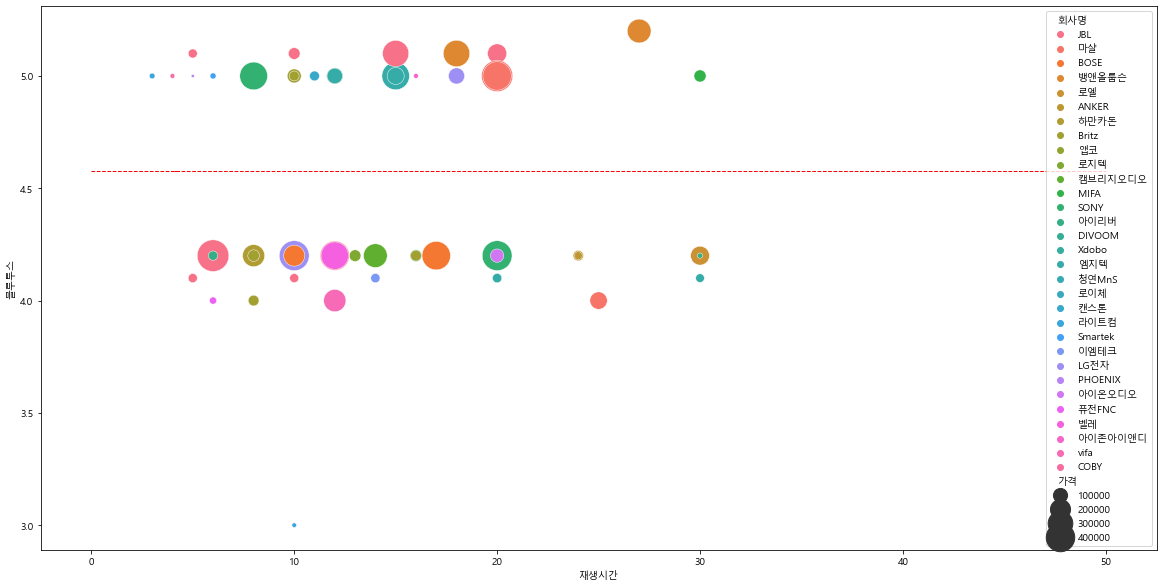

In [194]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='재생시간', y='블루투스', 
                size = '가격', hue = chart_data['회사명'],
                data = chart_data, sizes=(10,1000))

plt.hlines(use_time_mean_value,0,50,color='red',
          linestyle='dashed', linewidth=1)

plt.hlines(use_time_mean_value,4.1,4.3,color='red',
          linestyle='dashed', linewidth=1)

plt.show()

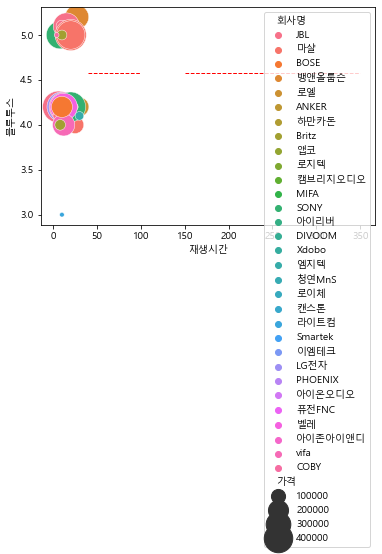

In [193]:
suction_max_value = chart_data['재생시간'].max()
suction_mean_value = chart_data['재생시간'].mean()
use_time_max_value = chart_data['블루투스'].max()
use_time_mean_value = chart_data['블루투스'].mean()

sns.scatterplot(x='재생시간', y='블루투스', 
                size = '가격', hue = chart_data['회사명'],
                data = chart_data, sizes=(10,1000))

plt.hlines(use_time_mean_value,150,350,color='red',
          linestyle='dashed', linewidth=1)

plt.hlines(use_time_mean_value,40,100,color='red',
          linestyle='dashed', linewidth=1)

plt.show()

In [221]:
chart_data_selected = chart_data[:10]

In [259]:
chart_data

,카테고리,회사명,제품,가격,재생시간,블루투스
20,포터블스피커,로엘,버스킹 DJ,176100,30.0,4.2
45,포터블스피커,MIFA,A90,73984,30.0,5.0
319,포터블스피커,엠지텍,락 클래식 Q80 미니,39040,30.0,4.1
95,포터블스피커,아이리버,사운드 에펠 TWS-EF7,15670,30.0,4.2
116,포터블스피커,뱅앤올룹슨,B&O PLAY Beosound Explore,279900,27.0,5.2
...,...,...,...,...,...,...
296,PC스피커,WEZEL,WZ-S875U,4240,NaN,NaN
107,PC스피커,앱코,SLP15,3700,NaN,NaN
208,PC스피커,앱코,SLP10,3700,NaN,NaN
375,PC스피커,디지클럽,QNIX QS-1000U,3040,NaN,NaN


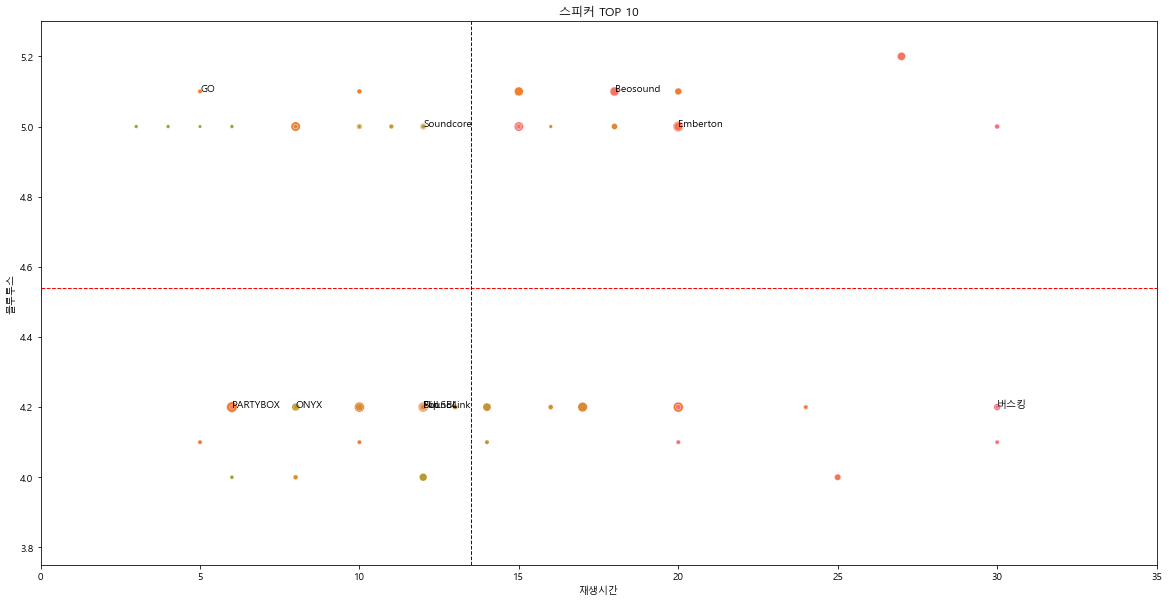

In [258]:
suction_max_value = chart_data_selected['재생시간'].max()
suction_mean_value = chart_data_selected['재생시간'].mean()
use_time_max_value = chart_data_selected['블루투스'].max()
use_time_mean_value = chart_data_selected['블루투스'].mean()

plt.figure(figsize=(20,10))
plt.title('스피커 TOP 10')
sns.scatterplot(x='재생시간', y='블루투스', 
                size = '가격', hue = chart_data['회사명'],
                data = chart_data, sizes=(10,1000), legend=False)


plt.hlines(use_time_mean_value,0,35,color='red',
          linestyle='dashed', linewidth=1)

plt.vlines(suction_mean_value,3.75,5.3,color='blue',
          linestyle='dashed', linewidth=1)

plt.ylim(3.75,5.3)
plt.xlim(0,35)

for index, row in chart_data_selected.iterrows():
    x = row['재생시간']
    y = row['블루투스']
    s = row['제품'].split(' ')[0]
    plt.text(x,y,s,size=10)
    
plt.show()

In [ ]:
plt.hlines(use_time_mean_value,150,350,color='red',
          linestyle='dashed', linewidth=1)

plt.hlines(use_time_mean_value,40,100,color='red',
          linestyle='dashed', linewidth=1)

In [ ]:
plt.plot([0,use_time_max_value],
         [suction_mean_value, suction_mean_value],
         'r--',lw=1)

plt.plot([use_time_mean_value, use_time_mean_value],
         [3.5, suction_max_value],
         'b--',lw=1)